In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as s
import scipy.stats as ss

In [2]:
data=pd.read_csv(r"C:\Users\hithe\Downloads\autos.csv",encoding='utf-8')

In [3]:
datac=data
datac.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


# Analysis 1

###  1) Perform general Data analysis

In [4]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [5]:
datac[datac.duplicated()]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
179448,2016-03-08 18:42:48,Mercedes_Benz_CLK_Coupe_230_Kompressor_Sport,privat,Angebot,1799,test,coupe,1999,automatik,193,clk,20000,7,benzin,mercedes_benz,nein,2016-03-08 00:00:00,0,89518,2016-03-09 09:46:57
242556,2016-03-28 00:56:10,Suzuki_Ignis,privat,Angebot,1000,control,kleinwagen,2002,manuell,83,andere,150000,1,benzin,suzuki,nein,2016-03-28 00:00:00,0,66589,2016-03-28 08:46:21
270719,2016-04-03 09:01:15,Mercedes_Benz_CLK_320_W209,privat,Angebot,4699,test,coupe,2003,automatik,218,clk,125000,6,benzin,mercedes_benz,ja,2016-04-03 00:00:00,0,75196,2016-04-07 09:44:54
341474,2016-03-18 18:46:15,Volkswagen_Passat_Variant_1.9_TDI_Highline,privat,Angebot,1999,control,kombi,2001,manuell,131,passat,150000,7,diesel,volkswagen,nein,2016-03-18 00:00:00,0,36391,2016-03-18 18:46:15


In [6]:
datac.drop_duplicates(inplace=True)

In [7]:
datac.drop(["nrOfPictures"],axis=1,inplace=True)

In [8]:
datac.head(3)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,90480,2016-04-05 12:47:46


In [9]:
datac["dateCrawled"]=pd.to_datetime(datac["dateCrawled"])
#datac["yearOfRegistration"]=pd.to_datetime(datac["yearOfRegistration"])
datac["dateCreated"]=pd.to_datetime(datac["dateCreated"])
datac["lastSeen"]=pd.to_datetime(datac["lastSeen"])

In [10]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371524 entries, 0 to 371527
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dateCrawled          371524 non-null  datetime64[ns]
 1   name                 371524 non-null  object        
 2   seller               371524 non-null  object        
 3   offerType            371524 non-null  object        
 4   price                371524 non-null  int64         
 5   abtest               371524 non-null  object        
 6   vehicleType          333655 non-null  object        
 7   yearOfRegistration   371524 non-null  int64         
 8   gearbox              351315 non-null  object        
 9   powerPS              371524 non-null  int64         
 10  model                351040 non-null  object        
 11  kilometer            371524 non-null  int64         
 12  monthOfRegistration  371524 non-null  int64         
 13  fuelType      

### 2) Can you tell me the Distribution of Vehicles based on Year of Registration with the help of a plot

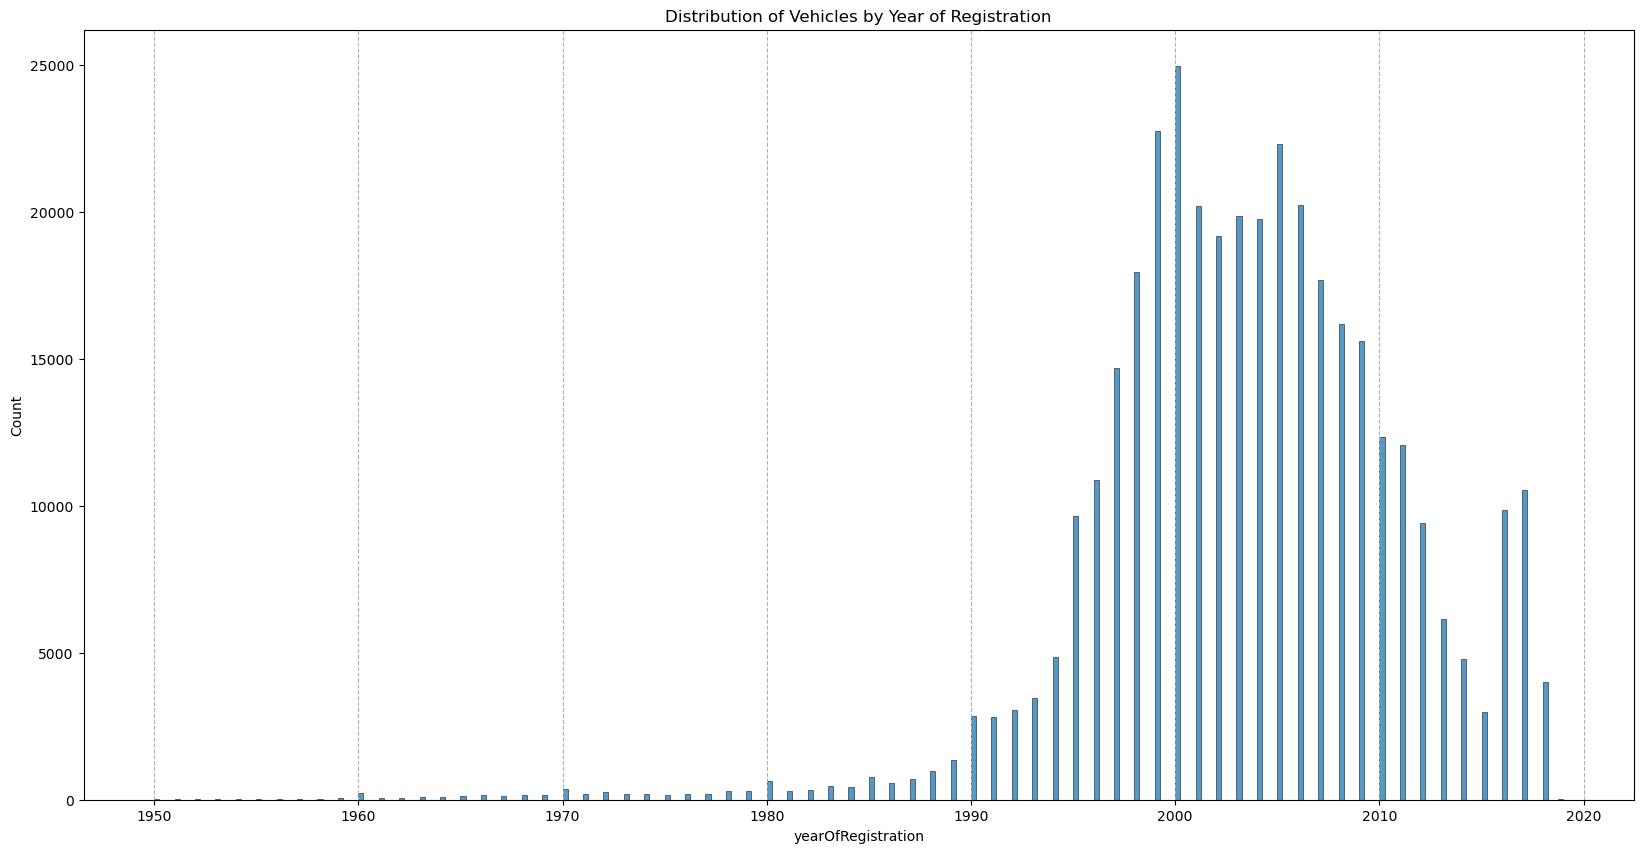

In [11]:
datac["yearOfRegistration"] = datac["yearOfRegistration"].where((datac["yearOfRegistration"] >= 1950) & 
                                                 (datac["yearOfRegistration"] <= 2023),datac["yearOfRegistration"].mode()[0])
plt.figure(figsize=(20, 10))
sns.histplot(data=datac, x=datac["yearOfRegistration"])
plt.title("Distribution of Vehicles by Year of Registration")
plt.grid(axis='x', linestyle='--')
plt.show()

### 3) Create a plot based on the Variation of the price range by the vehicle type

In [12]:
datac['vehicleType'].value_counts()

limousine     95894
kleinwagen    80022
kombi         67563
bus           30201
cabrio        22898
coupe         19013
suv           14707
andere         3357
Name: vehicleType, dtype: int64

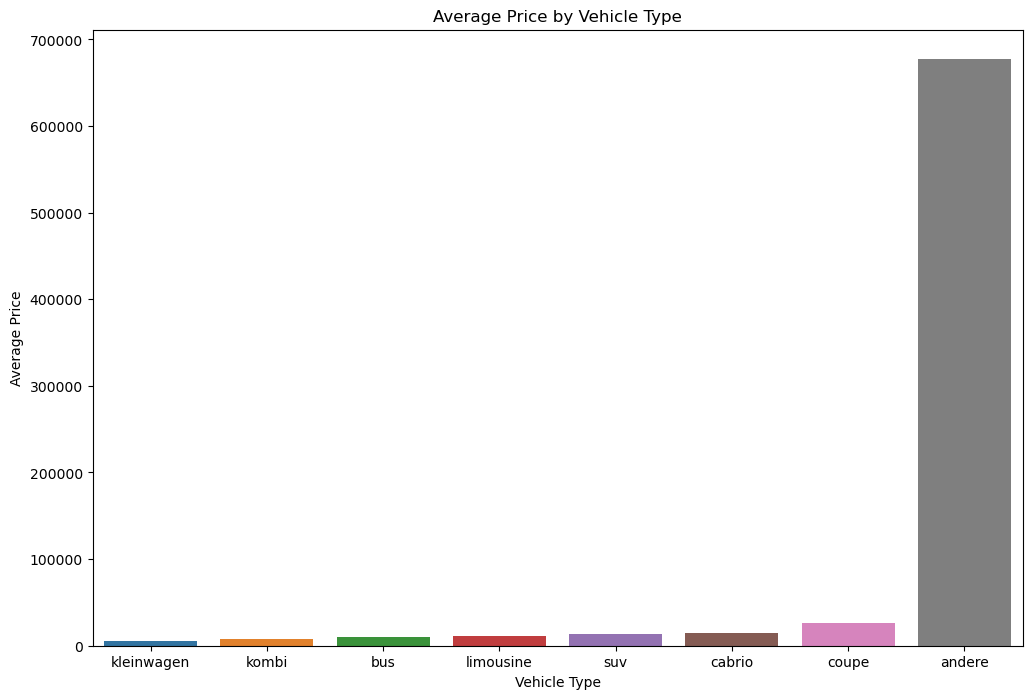

In [13]:
average_prices_by_type=datac.groupby('vehicleType')['price'].mean()
average_prices_by_type=average_prices_by_type.sort_values()
plt.figure(figsize=(12, 8))
sns.barplot(x=average_prices_by_type.index, y=average_prices_by_type.values)
plt.xlabel('Vehicle Type')
plt.ylabel('Average Price')
plt.title('Average Price by Vehicle Type')
plt.show()

###  4) Find out Total count of vehicles by type available on ebay for sale.As well as create a visualization for the client

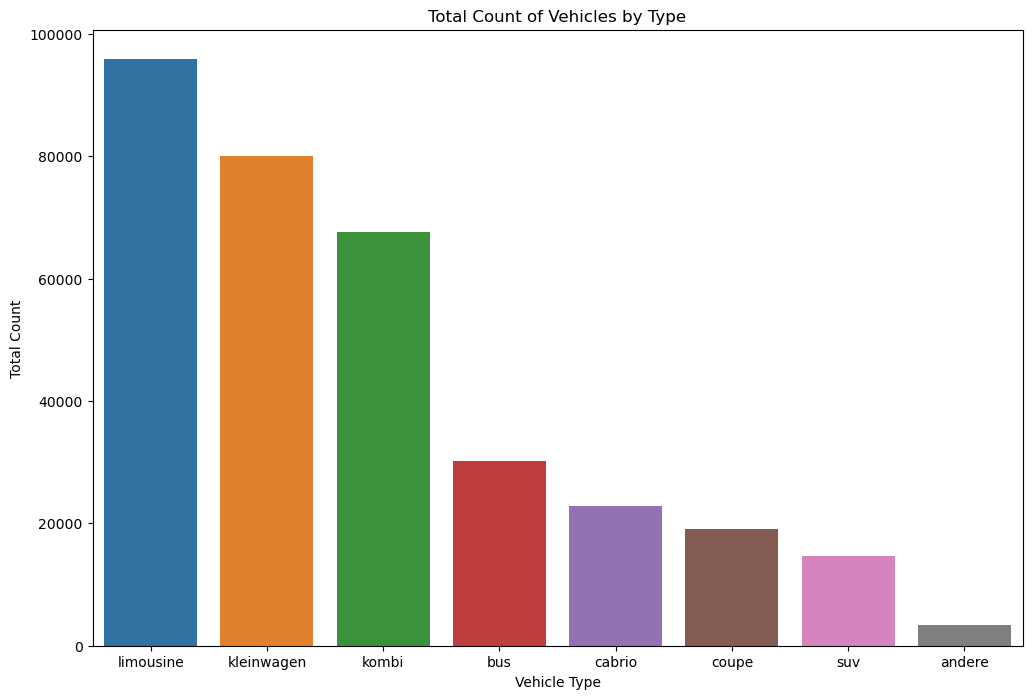

In [14]:
vehicle_count_by_type=datac['vehicleType'].value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=vehicle_count_by_type.index, y=vehicle_count_by_type.values)
plt.xlabel('Vehicle Type')
plt.ylabel('Total Count')
plt.title('Total Count of Vehicles by Type')
plt.show()

### 5) Is there any relationship between dollar_price and kilometer? (Explain with appropriate analysis)

In [15]:
datac[['price','kilometer']].corr(method='spearman')

,price,kilometer
price,1.00000,-0.37305
kilometer,-0.37305,1.00000


# Analysis 2

### 1) Can you tell me No of Vehicles by Brand Available on ebay for sale with the help of visualization

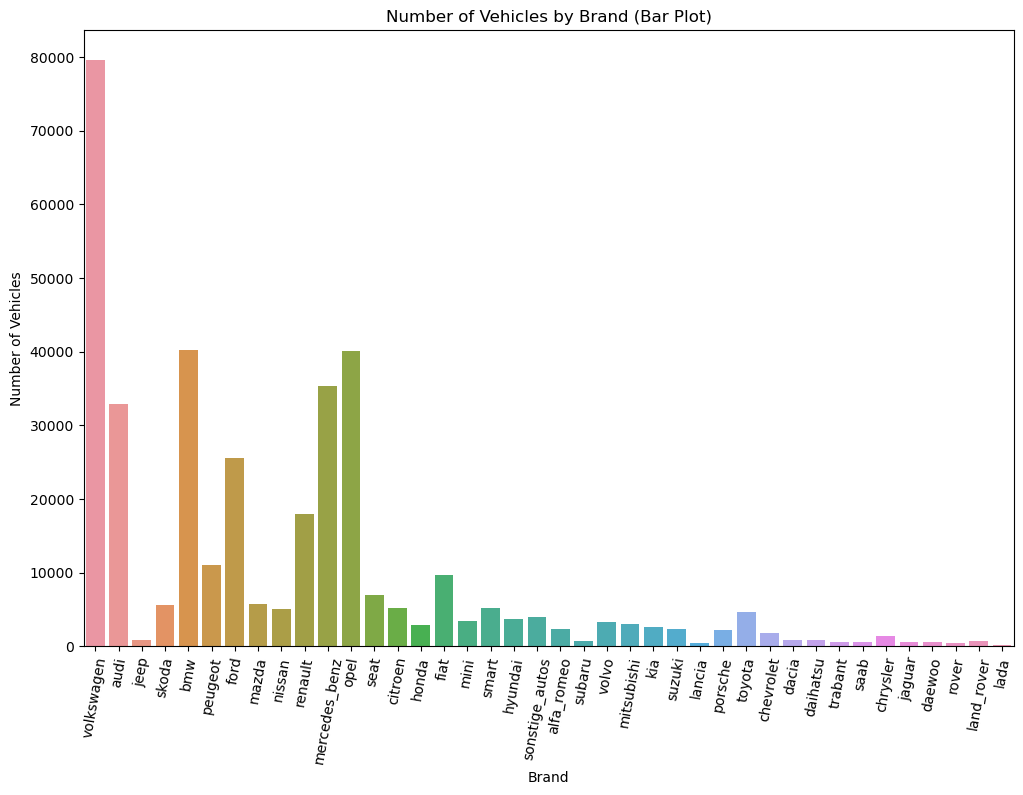

In [15]:
plt.figure(figsize=(12, 8))
sns.countplot(x=datac['brand'],)
plt.xticks(rotation=80)
plt.xlabel('Brand')
plt.ylabel('Number of Vehicles')
plt.title('Number of Vehicles by Brand (Bar Plot)')
plt.show()

### 2) What is the Average price for vehicles based on the type of vehicle as well as on the type of gearbox.Explain me with both numerical and visualization analysis

Numerical Analysis

In [16]:
avg_price_based_type=datac.groupby(['vehicleType','gearbox'])
avg_price_based_type['price'].mean()

vehicleType  gearbox  
andere       automatik      7366.861496
             manuell      825539.352000
bus          automatik     10599.265713
             manuell        6321.168265
cabrio       automatik     16254.374208
             manuell       14897.823880
coupe        automatik     35510.948175
             manuell       12400.255031
kleinwagen   automatik      3889.552200
             manuell        4606.803784
kombi        automatik      8910.045892
             manuell        7464.741491
limousine    automatik     19004.102243
             manuell        8505.151711
suv          automatik     16764.091774
             manuell       10040.553599
Name: price, dtype: float64

Visualization Analysis

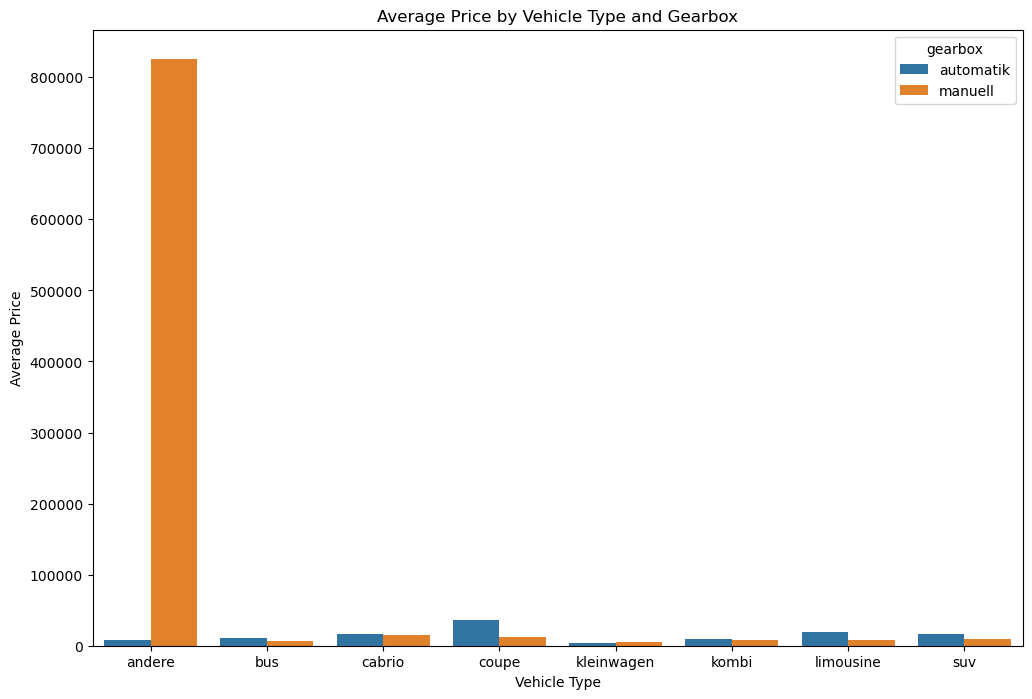

In [17]:
avg_price_type=datac.groupby(['vehicleType', 'gearbox'])['price'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_price_type, x='vehicleType', y='price', hue='gearbox')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Price')
plt.title('Average Price by Vehicle Type and Gearbox')
plt.show()

### 3) What is the marginal probability of private seller

In [17]:
pd.crosstab(index=datac["seller"]=="privat",columns=data["seller"]=="gewerblich",rownames=["privat"],colnames=["gewerblich"],normalize="all",margins=True)

gewerblich,False,True,All
privat,,,
False,0.000000,0.000008,0.000008
True,0.999992,0.000000,0.999992
All,0.999992,0.000008,1.000000


# Analysis 3

### 1) The memory usage of the data is around 6.1 mb.How can we reduce the memory usage of the data set?

In [19]:
datac['price']=datac['price'].astype(np.int32)
datac['kilometer']=datac['kilometer'].astype(np.int32)
datac['monthOfRegistration']=datac['monthOfRegistration'].astype(np.int32)

In [21]:
datac.drop(["dateCrawled"],axis=1,inplace=True)
datac.drop(["dateCreated"],axis=1,inplace=True)
datac.drop(["postalCode"],axis=1,inplace=True)
datac.drop(["lastSeen"],axis=1,inplace=True)
datac.columns

Index(['name', 'seller', 'offerType', 'price', 'abtest', 'vehicleType',
       'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer',
       'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage'],
      dtype='object')

In [22]:
memory=datac.memory_usage().sum()
memory_in_MB=memory/(1024**2)
memory_in_MB

41.10029602050781

### 2) What is the Average price of vehicle by fuel type and gearbox type.Give a plot

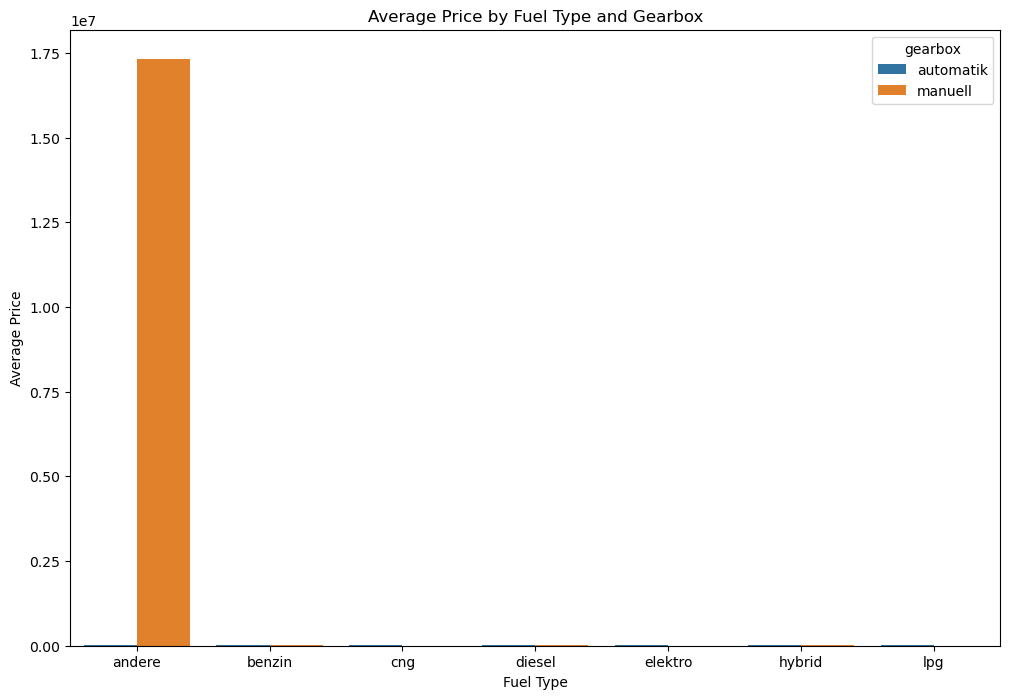

In [18]:
avg_price_fueltype=datac.groupby(['fuelType', 'gearbox'])['price'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_price_fueltype, x='fuelType', y='price', hue='gearbox')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.title('Average Price by Fuel Type and Gearbox')
plt.show()

### 3) What is the Average power of a vehicle by vehicle type and gearbox type.Give a plot

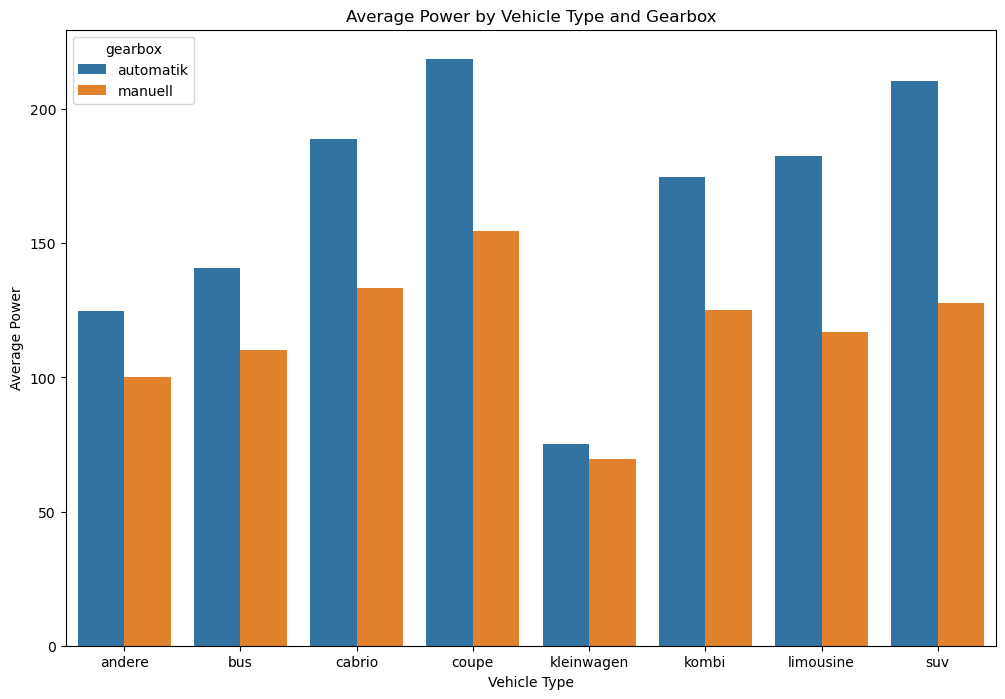

In [20]:
avg_power_type=datac.groupby(['vehicleType', 'gearbox'])['powerPS'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_power_type, x='vehicleType', y='powerPS', hue='gearbox')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Power')
plt.title('Average Power by Vehicle Type and Gearbox')
plt.show()

### 4) What is the Average price of a vehicle by brand as well as vehicle type.Use heatmap to explain this

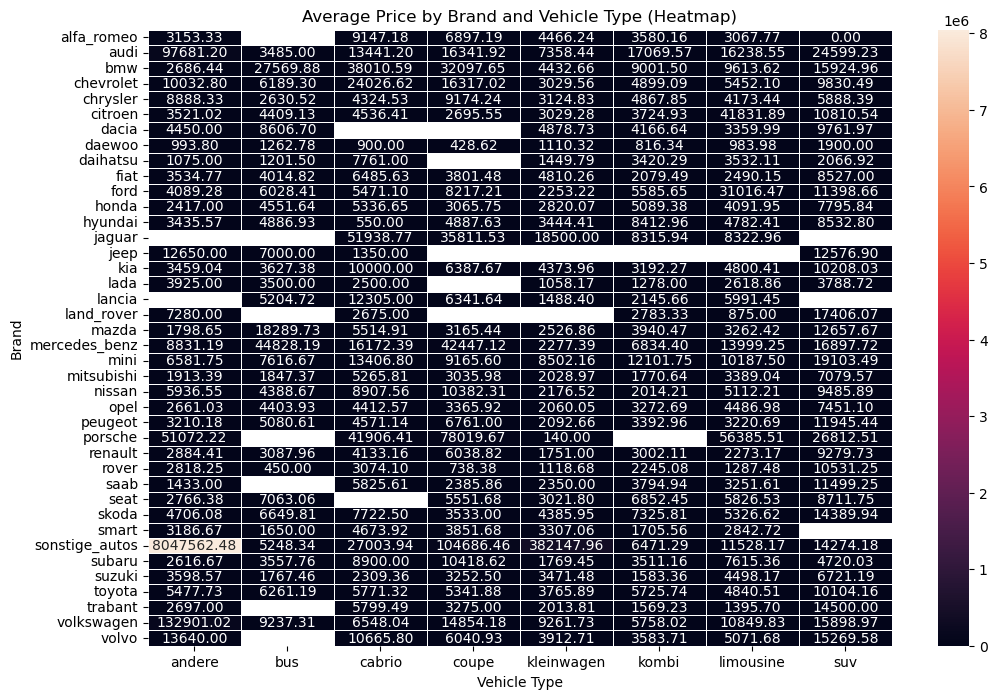

In [24]:
heatmap_data=datac.groupby(['brand', 'vehicleType'])['price'].mean().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", linewidths=.5)
plt.xlabel('Vehicle Type')
plt.ylabel('Brand')
plt.title('Average Price by Brand and Vehicle Type (Heatmap)')
plt.show()